In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import qutip.testing as qt

# Task 1 
* Write down a general function using the built-in plot_wigner function to visualize the Wigner function in 2D and 3D for a given state $\ket \psi$

<Figure size 9600x6400 with 0 Axes>

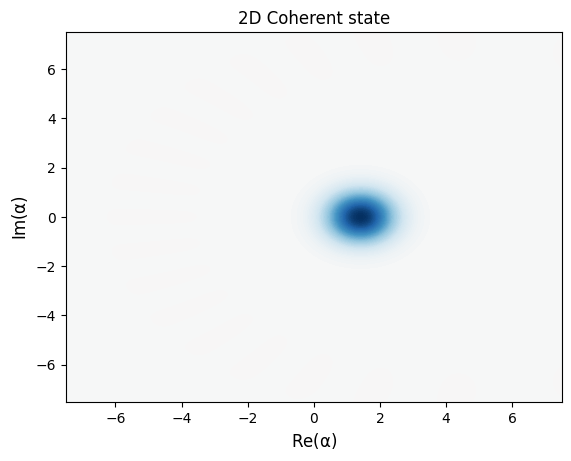

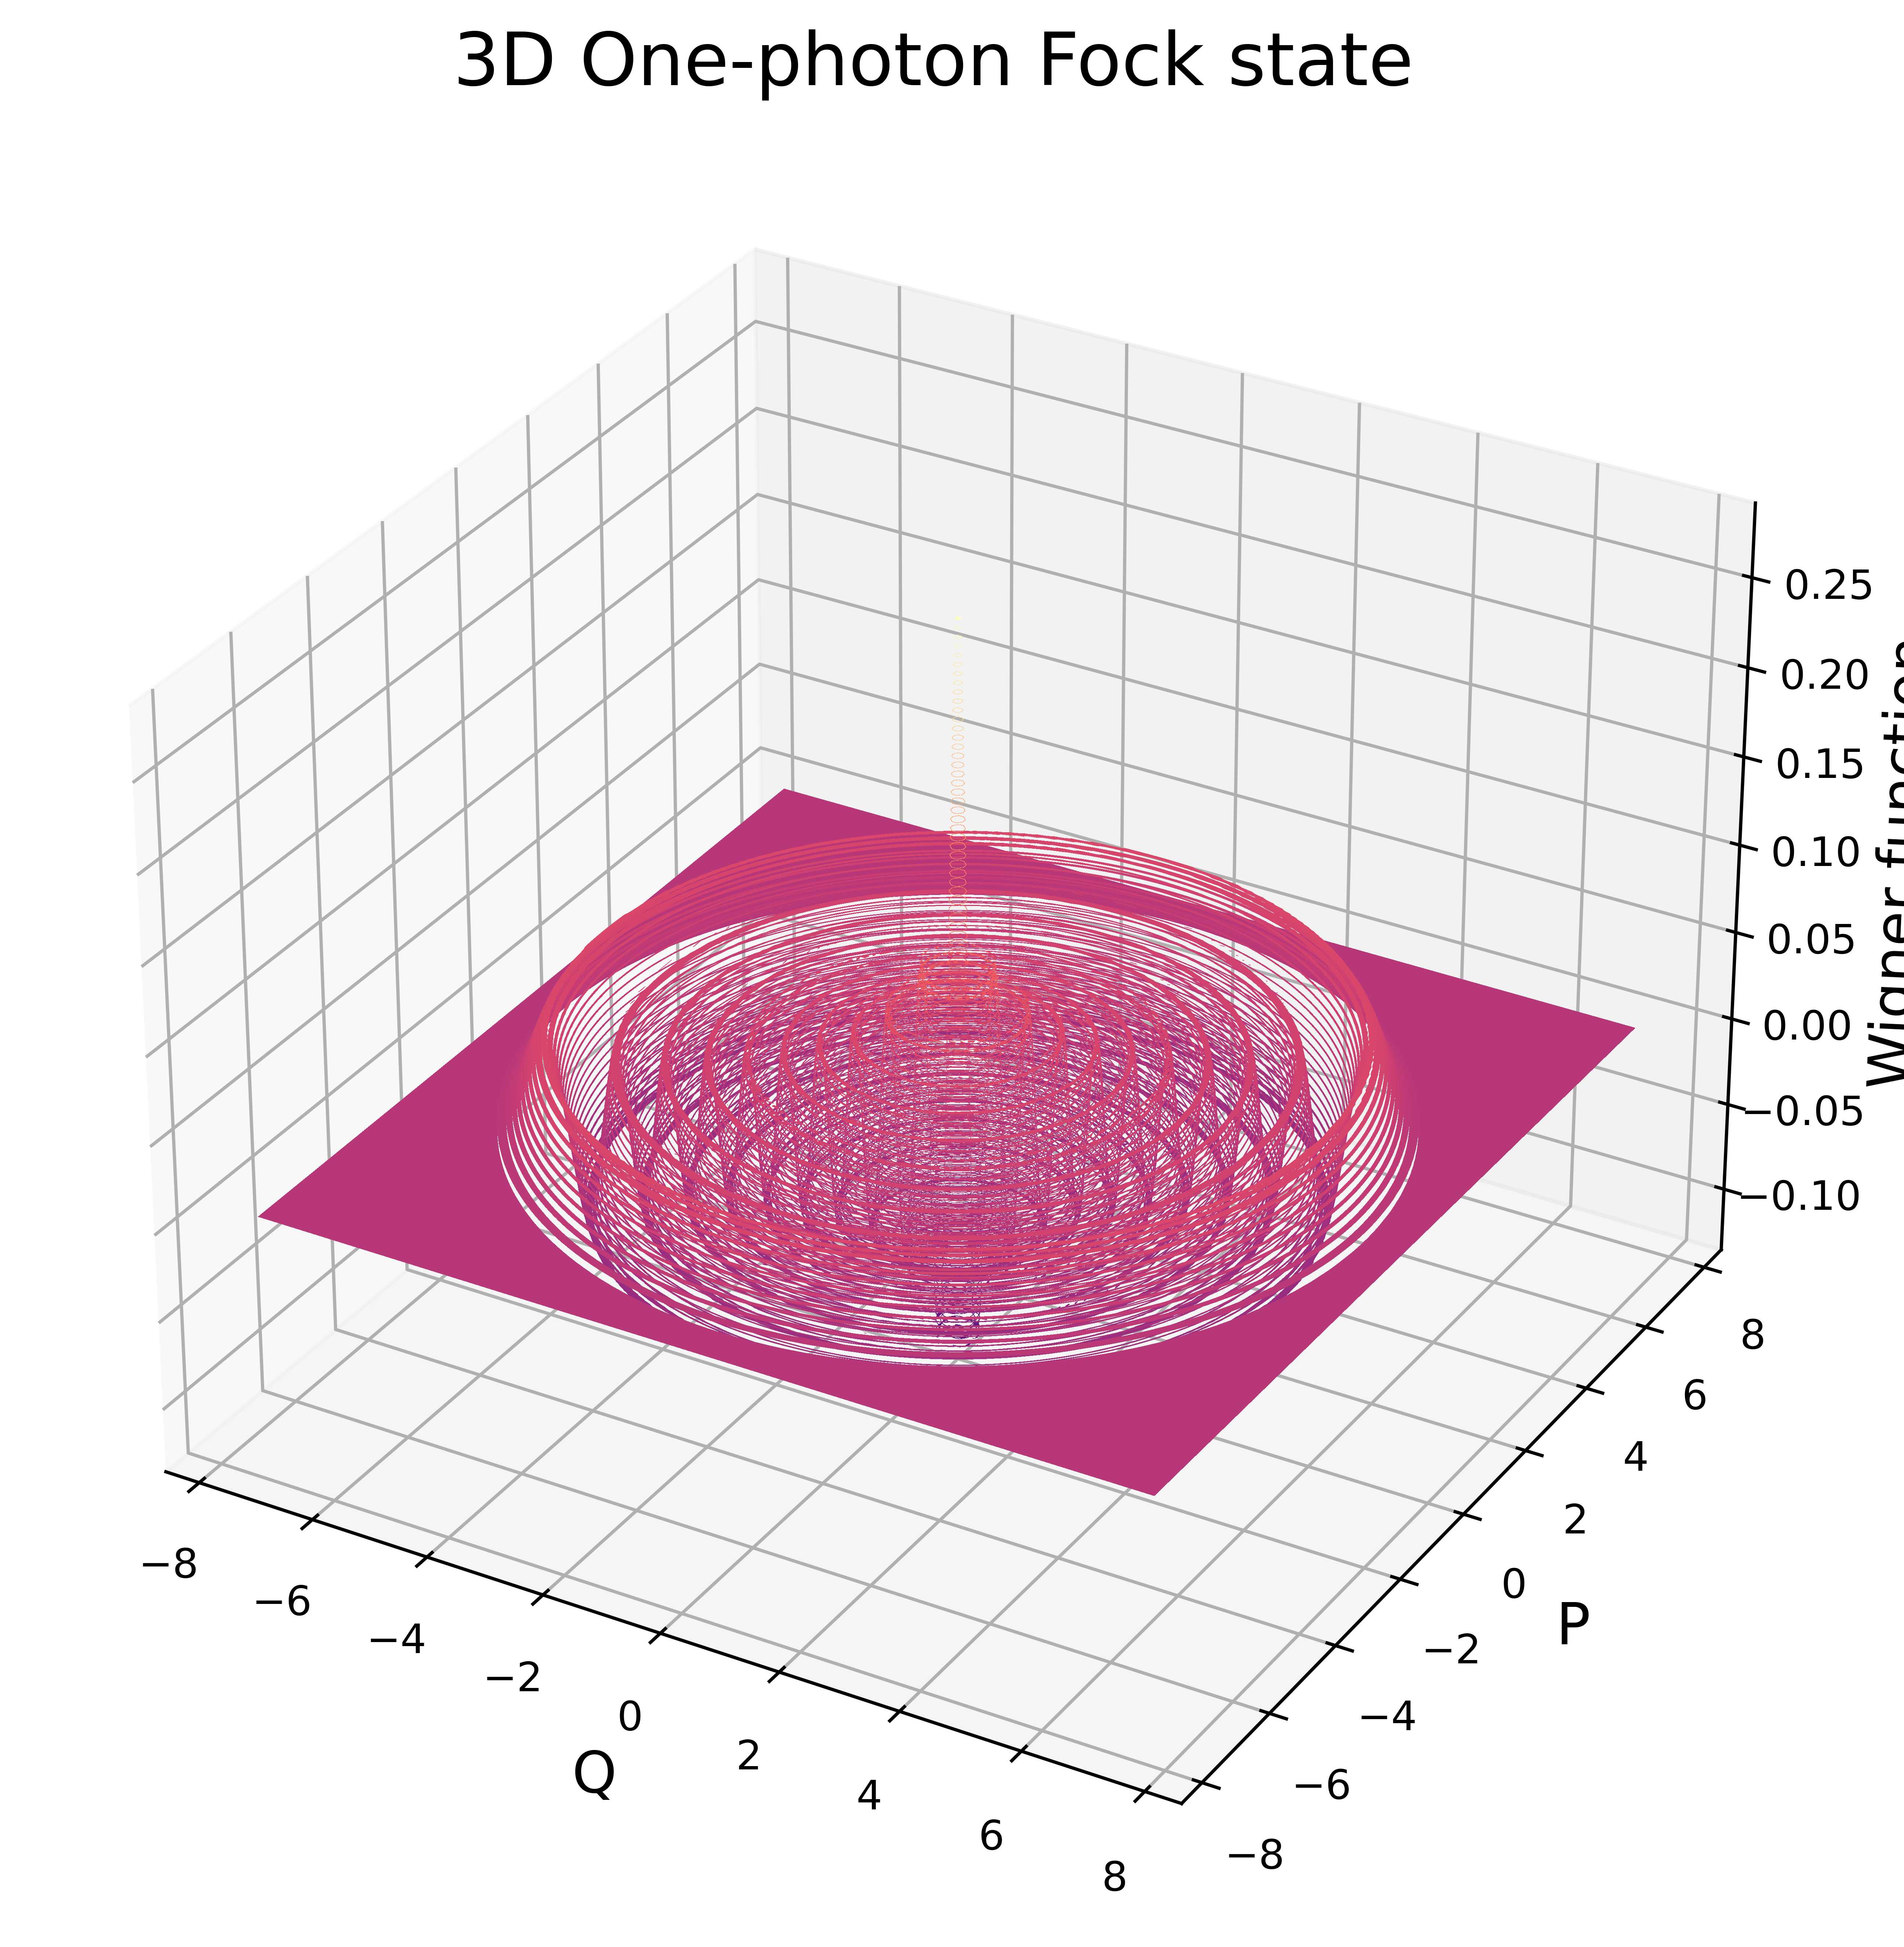

In [10]:
fig = plt.figure(figsize=(12, 8), dpi=800)

#plotting a 2D coherent state density
alpha = coherent_dm(20, 1)
plot_wigner(alpha)
plt.title(rf"2D Coherent state")

#plotting ten photon mixed state
fock_1 = basis(50, 20)
fig = plt.figure(figsize=(10, 8), dpi=800)
ax = fig.add_subplot(111, projection='3d')
plot_wigner(fock_1, fig=fig, ax=ax, cmap = "magma")
ax.set_xlabel('Q', fontsize=14)
ax.set_ylabel('P', fontsize=14)
ax.set_zlabel('Wigner function', fontsize=14)
plt.title(r"3D One-photon Fock state", fontsize=18)
plt.show()

We see the coherent state is just a displaced single photon fock state. The single photon state has negative probability in the origin, we will discuss this later.

# Task 2 & 3
* The Fock state $\ket n$ is defined using the built-in function basis(N,n) for a Fock space of length N. In this exercise we assume a Fock space of length $N = 20$, being some sort of cutoff. We wish to plot the Wigner distribution of the first four Fock states.

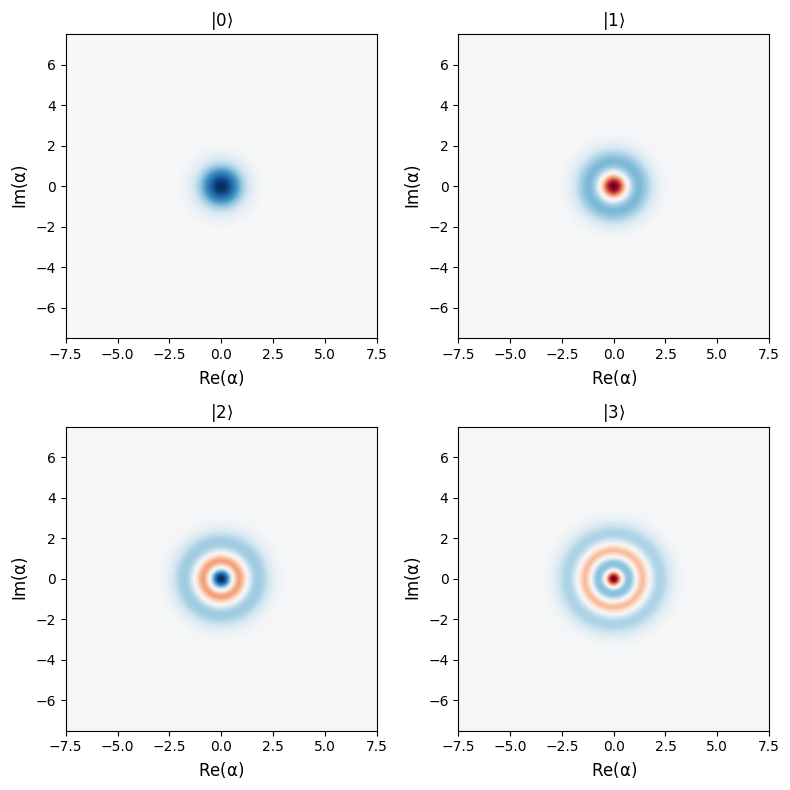

In [3]:
N = 20  # Number of basis states

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

# Loop over Fock states |n⟩ for n=0,1,2,3
for n, ax in zip([0, 1, 2, 3], axes):
    state = basis(N, n)  # Create Fock state |n⟩
    plot_wigner(state, fig=fig, ax=ax)
    ax.set_title(r"$|{n}\rangle$".format(n=n))

fig.tight_layout()
plt.show()

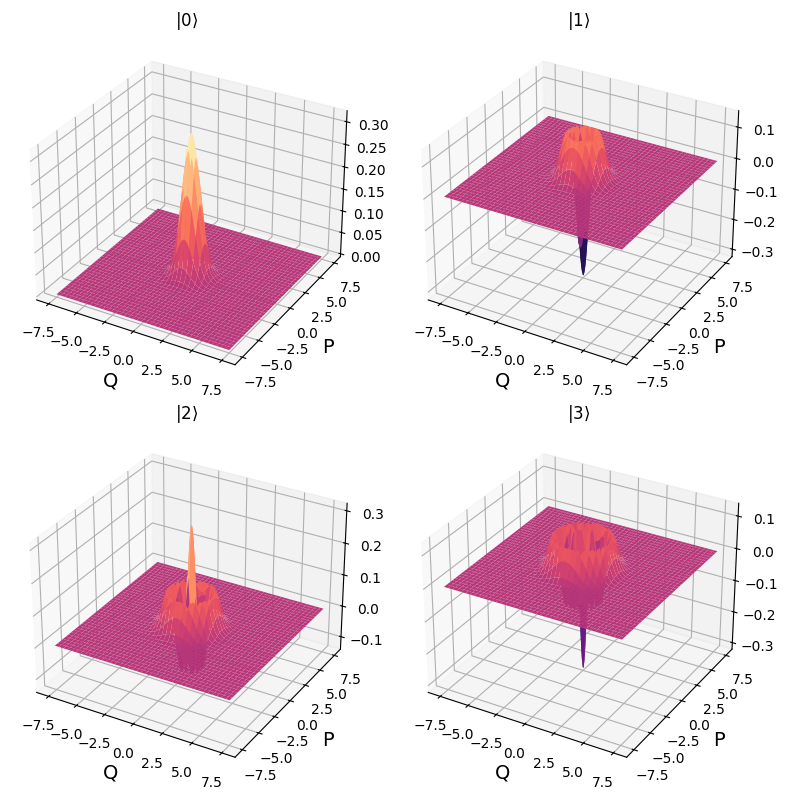

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), subplot_kw={'projection': '3d'})
axes = axes.flatten()

for n, ax in zip([0, 1, 2, 3], axes):
    state = basis(N, n)
    plot_wigner(state, fig=fig, ax=ax, cmap="magma", projection='3d') 
    ax.set_title(r"$|{n}\rangle$".format(n=n))
    ax.set_xlabel('Q', fontsize=14)
    ax.set_ylabel('P', fontsize=14)

fig.tight_layout()
plt.show()

$\textbf{Q:}$ It is clear that we have a "quasiprobabilistic" nature of the Wigner Function, which is demonstrated by having negative probabilities. Negative values in the Wigner function indicate a departure from classical mechanics, where all probability distributions are strictly positive or zero. In quantum mechanics, these negative regions highlight the inability to describe the quantum state with a classical probability distribution, reflecting phenomena such as superposition and entanglement. The Wigner function is not a true probability distribution because it doesn't directly give measurable probabilities in the classical sense. Its marginal distributions over position or momentum do give valid probabilities, but its values in phase space are not constrained to being positive. These negative regions in the Wigner function reflect the non-classical interference effects characteristic of such states.

# Task 4
* The coherent state $\ket \alpha$ is defined using the built-in function coherent(N,α), where $N$ is similar to part (2). Plot the Wigner function of a coherent state $\ket \alpha$ for $\alpha = 2$ and $\alpha = -2$

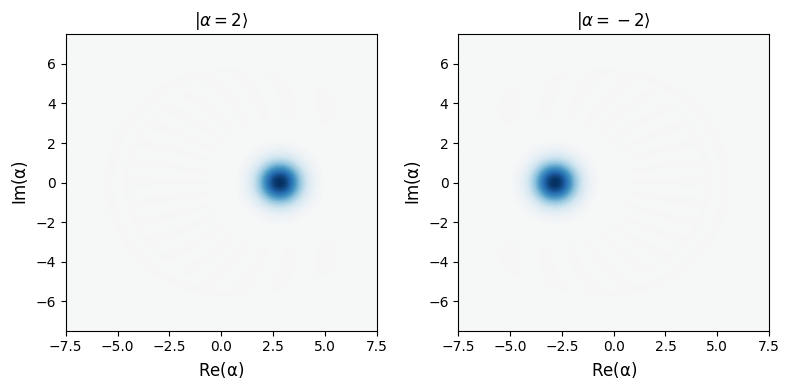

In [5]:
N = 20  # Hilbert space dimension
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Create coherent states with alpha = 2 and alpha = -2
a_2 = coherent(N, 2)
a_minus2 = coherent(N, -2)

plot_wigner(a_2, fig=fig, ax=axes[0])
axes[0].set_title(r"$|\alpha = 2\rangle$")

plot_wigner(a_minus2, fig=fig, ax=axes[1])
axes[1].set_title(r"$|\alpha = -2\rangle$")

fig.tight_layout()
plt.show()

$\textbf{Q:}$ It is clear that the coherent state is a displaced vacuum state. In the first we see its displaced by $\hat D(\alpha=2)$ and vice versa for the second one. We can generate the vacuum state and apply the displacement operator after as seen below.

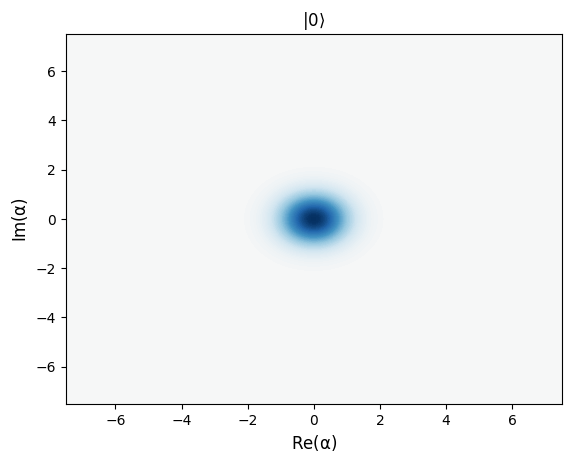

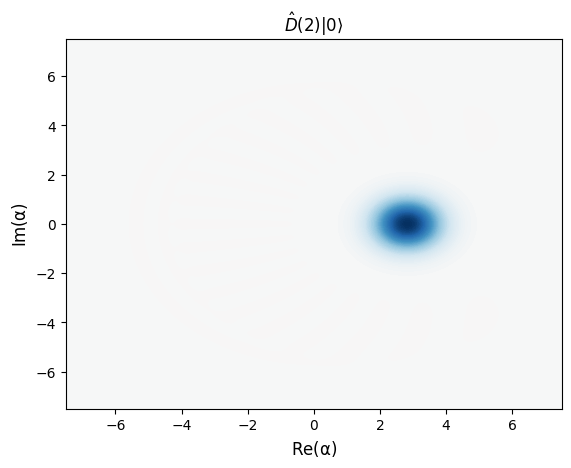

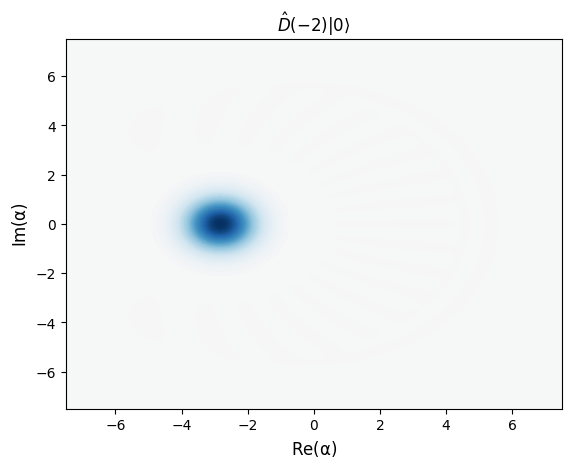

In [6]:
vacuum = basis(N, 0)
D_2 = displace(N, 2)
D_minus2 = displace(N, -2)

plot_wigner(vacuum)
plt.title(r"$| 0 \rangle$")
plot_wigner(D_2 @ vacuum)
plt.title(r"$\hat D(2) | 0 \rangle$")
plot_wigner(D_minus2 @ vacuum)
plt.title(r"$\hat D(-2) | 0 \rangle$")
plt.show()

We see by the plots, just by displacing by the respective $\alpha$, we recover the same exact state. This demonstrates that the coherent states are just displaced vacuum states.

# Task 5

In quantum mechanics a cat state is a quantum state that is a superposition of two diametrically opposed states at the same time, such as the possibilities that a cat be alive and dead at the same time (Schrödinger's cat). In quantum optics a Schrödinger cat state is composed of two coherent states with opposite phases $\ket \alpha$ and $\ket{-\alpha}$:

\begin{equation}
\ket{cat} = \frac{\ket \alpha + \ket{-\alpha}}{\sqrt{2}}
\end{equation}


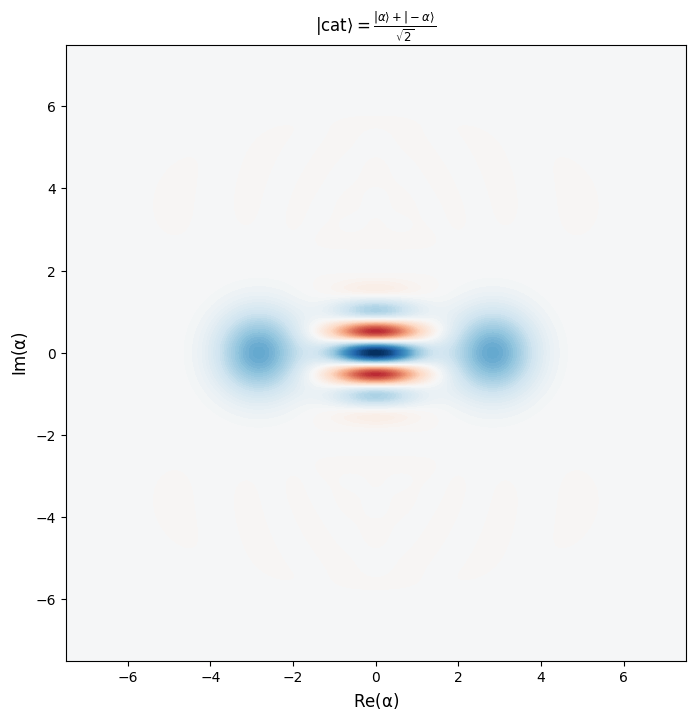

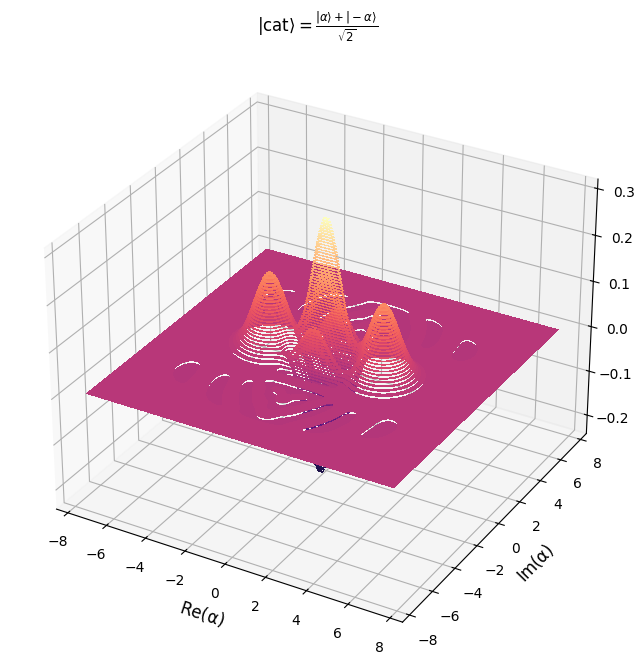

In [7]:
# Create the cat state |cat> = (|alpha> + |-alpha>) / sqrt(2)
cat_state = (a_2 + a_minus2).unit() 
fig, ax = plt.subplots(figsize=(8, 8))
plot_wigner(cat_state, fig=fig, ax=ax)
ax.set_title(r"$|\text{cat} \rangle = \frac{|\alpha\rangle + |-\alpha\rangle}{\sqrt{2}}$")
plt.show()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': '3d'})
plot_wigner(cat_state, fig=fig, ax=ax, cmap='magma')
ax.set_title(r"$|\text{cat} \rangle = \frac{|\alpha\rangle + |-\alpha\rangle}{\sqrt{2}}$")
plt.show()

$\textbf{Q:}$ Comparing this cat state with the individual coherent states or displaced vacuum states, we can that the intensity of the coherent states (at $\alpha = 2$ and $\alpha = -2$) is much weaker in this superposed state. 

The intensity is strongest at the midpoint between the two superposed states, but is squeezed in a sense. The two states generated kind of four peaks in the Wigner distribution as we can see in the 3D projection, indicating that the amount of randomness increases with the amount of photons that you add to the system, it becomes less predictable. This is probably because of their interference with each other. The cat can be dead (to the left), alive (to the right), or both at the same time (in the middle - most probable, but at a smaller region).